# ANOVA

Table of contents

Intro

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [7]:
%matplotlib inline

In [8]:
# Define the path to the CSV file
csv_file_path = r'data\flavors_of_cacao.csv'

# Read the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/HesusG/course-itesm-data-mining/refs/heads/main/2_ANOVA/data/flavors_of_cacao.csv")
# Display the first few rows to verify
display(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru



Missing Values in Each Column:
Company                             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64


# Pre-Procesing 

In [9]:
# Drop rows with missing 'Bean Type' if it's essential; otherwise, keep them
# For this analysis, we'll keep them as we're focusing on 'Broad Bean Origin'
# But ensure 'Broad Bean Origin' and 'Rating' are not missing

# Convert 'Cocoa Percent' to float
df['Cocoa Percent'] = df['Cocoa Percent'].str.rstrip('%').astype(float)


# Verify data types
print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
Company                              object
Specific Bean Origin or Bar Name     object
REF                                   int64
Review Date                           int64
Cocoa Percent                       float64
Company Location                     object
Rating                              float64
Bean Type                            object
Broad Bean Origin                    object
dtype: object


#   EDA

In [10]:
# Display summary statistics for 'Rating' grouped by 'Broad Bean Origin'
print("\nSummary Statistics by Broad Bean Origin:")
display(df.groupby('Broad Bean Origin')['Rating'].describe())



Summary Statistics by Broad Bean Origin:


,count,mean,std,min,25%,50%,75%,max
Broad Bean Origin,,,,,,,,
"Africa, Carribean, C. Am.",1.0,2.750000,NaN,2.75,2.750,2.750,2.7500,2.75
Australia,3.0,3.250000,0.500000,2.75,3.000,3.250,3.5000,3.75
Belize,49.0,3.234694,0.320352,2.75,3.000,3.250,3.5000,4.00
Bolivia,57.0,3.197368,0.421882,2.00,3.000,3.250,3.5000,4.00
Brazil,58.0,3.284483,0.417407,1.75,3.000,3.375,3.5000,4.00
...,...,...,...,...,...,...,...,...
"Venezuela, Trinidad",1.0,2.500000,NaN,2.50,2.500,2.500,2.5000,2.50
Venezuela/ Ghana,1.0,3.500000,NaN,3.50,3.500,3.500,3.5000,3.50
Vietnam,38.0,3.315789,0.316677,2.75,3.000,3.375,3.5000,4.00


In [11]:
# Define the list of desired origin countries
selected_origins = ['Mexico', 'Colombia', 'Ghana', 'Nigeria', 'Cameroon', 'Madagascar', 'Togo', 'Uganda', 'Sierra Leone']

# Filter the DataFrame
df = df[df['Broad Bean Origin'].isin(selected_origins)].copy()

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

# Check the number of entries per origin
print("Number of chocolates per Origin Country:")
print(df['Broad Bean Origin'].value_counts())


Number of chocolates per Origin Country:
Madagascar    145
Colombia       40
Ghana          33
Mexico         30
Uganda          8
Togo            3
Nigeria         1
Cameroon        1
Name: Broad Bean Origin, dtype: int64


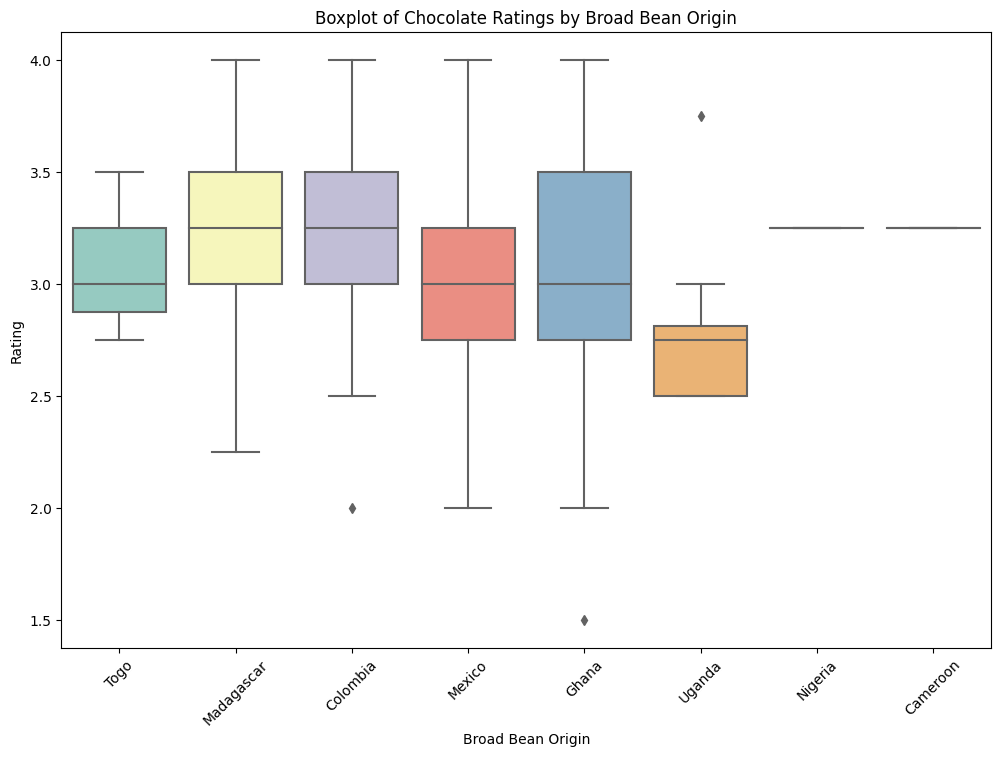

In [12]:
# Boxplot to visualize the distribution of ratings by Broad Bean Origin
plt.figure(figsize=(12, 8))
sns.boxplot(x='Broad Bean Origin', y='Rating', data=df, palette="Set3")
plt.title('Boxplot of Chocolate Ratings by Broad Bean Origin')
plt.xlabel('Broad Bean Origin')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# ANOVA

# Verify Assumptions

## One-Way ANOVA

## Conclusions 